In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from cProfile import label
import pandas as pd


# Part Zero: code revisions:

We are using the longer side as the y-axis and the shorter side as x. This doesn't affect the code but is inconsistent with the examples in the first part.

# Part One: code restrictions.

###
1. this code is only used when the marker y-axis is in the first two quardrant
2. this code needs you to identify any reflection by the microscope
3. That means, you have to identify your microscope transformation (reflections) so that the y' axis is in the first two qudrant

Below gives a prescripted x-y marker coordinate

No handles with labels found to put in legend.


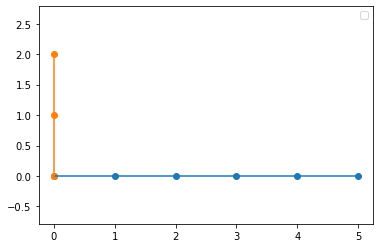

In [7]:
mxx = [0,1,2,3,4,5]
mxy = np.zeros(6)
myx = np.zeros(3)
myy = [0,1,2]

plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

No handles with labels found to put in legend.


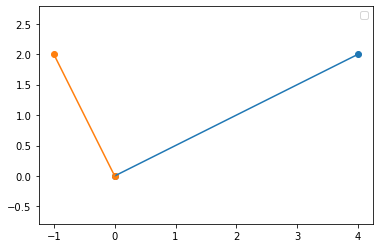

In [8]:
mxx = np.array([0, 4])
mxy = np.array([0, 2])
myx = np.array([0, -1])
myy = np.array([0, 2])  
plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

No handles with labels found to put in legend.


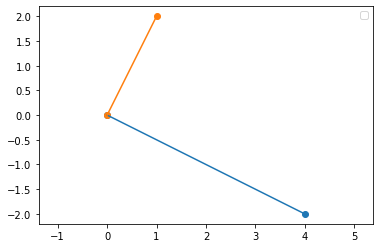

In [9]:
mxx = np.array([0, 4])
mxy = np.array([0, -2])
myx = np.array([0, 1])
myy = np.array([0, 2])  
plt.axis('equal')
plt.scatter(mxx, mxy)
plt.scatter(myx, myy)
plt.plot(mxx, mxy)
plt.plot(myx, myy)
plt.legend()

# Part Two: registration program

In [10]:
xaxis = pd.read_csv('xMarkCor2.csv',skip_blank_lines=True)
yaxis = pd.read_csv('yMarkCor2.csv',skip_blank_lines=True)

hflip = 0
vflip = 0

hDotsX = xaxis['xx']
hDotsY = xaxis['xy']
vDotsX = yaxis['yx']
vDotsY = yaxis['yy']
# hDotsX = np.array([0, 2])
# hDotsY = np.array([0, 1])
# vDotsX = np.array([0, -1])
# vDotsY = np.array([0, 2])  

#activate if horizontal flip
if hflip:
    hDotsX = -1*hDotsX 
    vDotsX = -1*vDotsX 

#activate if vertical flip
if vflip:
    hDotsY = -1*hDotsY 
    vDotsY = -1*vDotsY 

    

nv = pd.read_csv('nv4mark.csv')

#nvx and nvy here are the marker coordinates
nvx = nv['x']
nvy = nv['y']
nvz = nv['z']

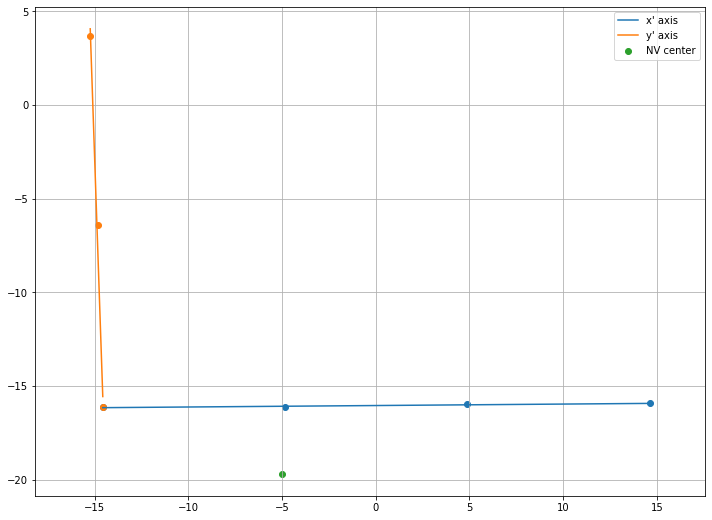

In [11]:
hk, hb = np.polyfit(hDotsX,hDotsY,1)
vk, vb = np.polyfit(vDotsX,vDotsY,1)
zeroX = (hb - vb) / (vk - hk)
zeroY = hk * zeroX + hb


#find the angle of rotation （y' axis from x axis, CCW）
if vk > 0:
    theta = math.atan(vk)
if vk < 0: 
    theta = math.pi - math.atan(-vk)
#find the new marker-coordinates of the NV center
confx = math.sin(theta)* nvx + math.cos(theta) * nvy
confy = - math.cos(theta)* nvx + math.sin(theta) * nvy

#translate the nv coordinate system to the origin
confx = confx + zeroX
confy = confy + zeroY

#activate if horizontal flip
if hflip:
    confx = -1*confx

#activate if vertical flip
if vflip:
    confy = -1*confy
    
fig = plt.figure(figsize=(12,9))
plt.grid()
plt.axis('equal')
plt.plot(hDotsX, hDotsX*hk+hb,label = 'x\' axis')
plt.scatter(hDotsX, hDotsY)
plt.plot(vDotsX, vDotsX*vk+vb,label = 'y\' axis')
plt.scatter(vDotsX, vDotsY)
plt.scatter(confx, confy, label='NV center')
plt.legend()

In [12]:
df = pd.DataFrame({'x': confx, 'y': confy, 'z': nvz})
df.to_csv('target_nv_coordinates_for_this_confocal_scan.csv')